# **Importando toda a base de dados e algumas bibliotecas úteis.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [2]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## **Criando uma tabela de frequência entre dose e tempo, e posteriormente uma tabela relacionando a dose com o tempo e o tratamento utilizado, utilizado o pd.crosstab do pandas.**

In [3]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [5]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

# **Fazendo uma normalização de acordo com o index e comparando, podemos perceber que "com_controle" e "com_droga" as proporções são bem parecidas**



In [24]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

# **Tabela de frequência usando o pd.groupby()**

In [28]:
dados.groupby(['tempo', 'dose']) ['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
tempo dose                         
24    D1             301       3585
      D2             305       3581
48    D1             343       4011
      D2             305       3591
72    D1             307       3600
      D2             305       3580

# **Fazendo uma normalização pela coluna**

In [35]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [37]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

É possível fazer a normalização passando o parâmetro 'columns' no normalize, ao invés de passar o parâmetro 'index'

# **Usando alguns agregadores (aggfunc)**

In [39]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

O Agregador de funções 'aggfunc' recebe uma função ou uma lista de funções.

No primeiro pd.crosstab() passei o argumento 'mean', onde irá fazer a média do 'g-0' para quando receber uma dose em pequena quantidade em 24h/48h/72h depois se comparado com controle e com droga.


In [40]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [41]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

Na segunda e terceira tabela foram passados os valores 'max' e 'min', onde irá mostrar os valores máximos e mínimos, respectivamente.

In [45]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

Nesse o aggfunc = 'std', nos mostra o desvio padrão de cada dose em um espaço de tempo

In [46]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Nesse o aggfunc = 'count', nos mostra a quantidade de tratamento (com_controle e com_droga)

In [48]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'first')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.1636     1.0620
     48          -0.6696     0.6280
     72          -0.6723     0.0743
D2   24          -1.3200     2.0440
     48           0.4860    -0.0630
     72           0.7344    -0.3254

Nesse o aggfunc = 'first', nos mostra o primeiro valor

In [47]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'last')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.0465     0.6660
     48           1.1120     0.1420
     72          -0.6204    -0.8598
D2   24           0.7200    -1.3260
     48           0.3942    -0.1150
     72          -0.1051    -0.4330

Nesse o aggfunc = 'last', nos mostra o último valor


# **Analisando os dados com gráfico de dispersão(scatterplot)**

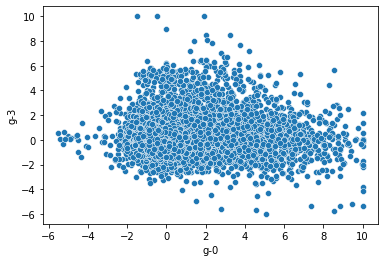

In [49]:
sns.scatterplot(x = 'g-0', y = 'g-3', data = dados)
plt.show()

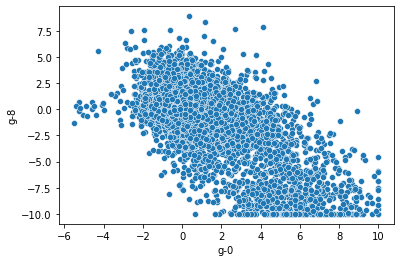

In [51]:
sns.scatterplot(x = 'g-0', y = 'g-8', data = dados)
plt.show()

Podemos perceber ao analisar os dois gráficos de dispersão que existe uma tendência decrescente, podemos afirmar essa tendência traçando uma linha de tendência no meio do gráfico, como pode-se verificar a seguir:

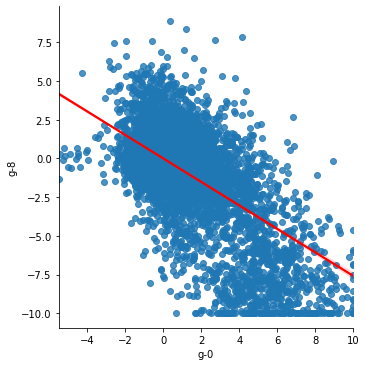

In [55]:
sns.lmplot(x = 'g-0', y = 'g-8', data = dados, line_kws = {'color':'red'})
plt.show()

A linha de tendência nos mostra claramente que o gráfico está decrescendo. Podemos afirmar que com o passar do tempo se comparado com o tratamento o gráfico continua na decrescente.

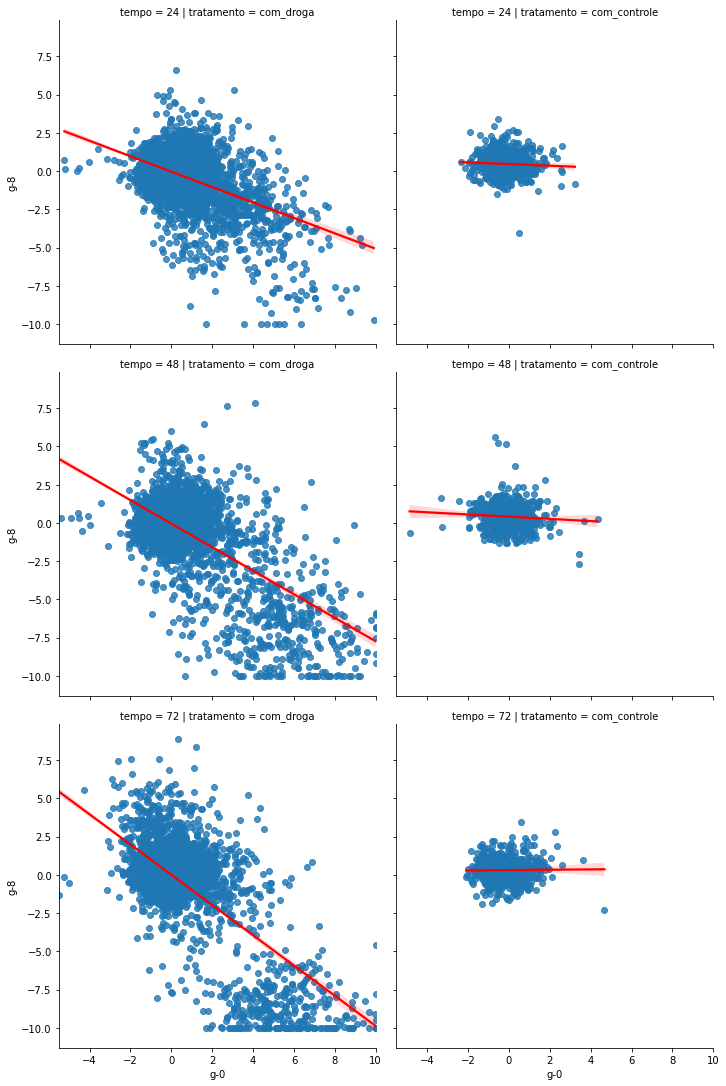

In [54]:
sns.lmplot(x = 'g-0', y = 'g-8', data = dados, line_kws = {'color':'red'}, col = 'tratamento', row = 'tempo')
plt.show()

# **Explorando o Metl**

A função pandas.DataFrame.melt() é usado para manipular o DataFrame, onde uma ou mais colunas são variáveis identificadoras

In [59]:
dados_melt = dados.groupby(by = ['dose', 'tratamento', 'tempo'])['tempo'].count().unstack()
dados_melt

tempo                24    48    72
dose tratamento                    
D1   com_controle   301   343   307
     com_droga     3585  4011  3600
D2   com_controle   305   305   305
     com_droga     3581  3591  3580

In [67]:
DataFrame = dados_melt.melt(value_name = 'Quantidade')
DataFrame

,tempo,Quantidade
0,24,301
1,24,3585
2,24,305
3,24,3581
4,48,343
5,48,4011
6,48,305
7,48,3591
8,72,307
9,72,3600


É possível fazer vários filtros usando o melt

# **Analisando a correlação entre G e C**

In [73]:
G = dados.loc[dados['tratamento']=='com_droga'].loc[:, 'g-0':'g-20']
C = dados.loc[dados['tratamento']=='com_droga'].loc[:, 'c-0':'c-20']

GC = pd.concat([G, C], axis = 1)

GC

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,0.9538,-0.8733,-0.2969,-0.7964,0.2447,-0.1552,-0.2402,-0.3265,-0.1232,0.6442,0.0523,0.1678,-0.5853,0.3106,0.6050,0.3089,0.5085,0.7467,0.0320,-0.7075,-0.5713
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,0.4224,0.1871,-0.4822,0.3713,0.4754,0.9512,0.4650,0.3005,0.0338,-0.7734,0.3922,-0.0028,1.3250,0.3832,1.4350,-0.3465,-0.6813,-0.0440,0.0016,-0.7588,0.5373
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,0.2144,0.4350,0.1174,1.3960,-0.6772,0.2316,-0.5396,0.0581,0.6067,-0.4622,0.1112,1.4440,-0.8000,0.3615,-0.4301,-0.0562,-0.2590,-1.3780,-0.3346,0.0869,-0.1766
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.5377,1.3240,0.9679,0.1419,1.2230,0.3404,-0.1589,0.8667,0.7749,-0.1458,0.4287,0.6342,-0.3830,-0.0918,-0.1479,1.4290,0.2736,0.9842,0.3394,-0.1685,0.3873


In [115]:
GC_corr = GC.corr()
corr = GC_corr.loc[:'g-20','c-0':]

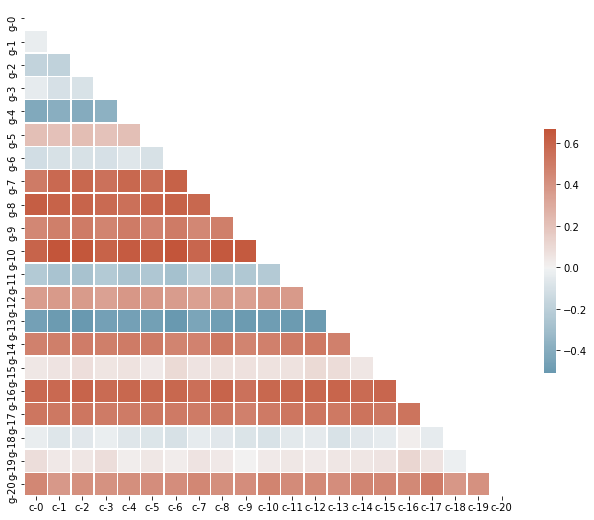

In [116]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Podemos perceber que quanto maior a relação entre "tratamento" e "com_droga" os quadrados do mapa de calor vão ficando cada vez mais vermelhos.